<a href="https://colab.research.google.com/github/Jeshwanth2/AI-ML-Internship-Task-13/blob/main/PCADimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# 1. Load the digits dataset
digits = load_digits()

# 2. Access the data and target attributes
X = digits.data  # Images are already flattened
y = digits.target

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data loaded and split successfully.
X_train shape: (1437, 64)
X_test shape: (360, 64)
y_train shape: (1437,)
y_test shape: (360,)


In [2]:
from sklearn.preprocessing import StandardScaler

# 1. Instantiate a StandardScaler object
scaler = StandardScaler()

# 2. Fit the scaler to the training data
scaler.fit(X_train)

# 3. Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

Data scaled successfully.
X_train_scaled shape: (1437, 64)
X_test_scaled shape: (360, 64)


In [3]:
from sklearn.decomposition import PCA

# Define a list of n_components values to iterate through
n_components_list = [2, 10, 30, 50]

# Initialize an empty list to store the explained variance ratios
explained_variances = []

# Loop through each n_components value
for n in n_components_list:
    # Instantiate a PCA object with the current n_components
    pca = PCA(n_components=n)

    # Fit the PCA object to the X_train_scaled data
    pca.fit(X_train_scaled)

    # Append the explained_variance_ratio_ attribute to the list
    explained_variances.append(pca.explained_variance_ratio_)

# Print the explained_variances list to inspect the results
for i, n in enumerate(n_components_list):
    print(f"PCA with {n} components explained variance ratio sum: {explained_variances[i].sum():.4f}")
    print(f"  Individual explained variance ratios: {explained_variances[i]}")

print("PCA applied for different component counts and explained variances collected.")

PCA with 2 components explained variance ratio sum: 0.2177
  Individual explained variance ratios: [0.12038006 0.09733098]
PCA with 10 components explained variance ratio sum: 0.5923
  Individual explained variance ratios: [0.12038006 0.09733098 0.08561821 0.06493777 0.04887914 0.04264048
 0.03949359 0.03349634 0.03023564 0.02931935]
PCA with 30 components explained variance ratio sum: 0.8956
  Individual explained variance ratios: [0.12038006 0.09733098 0.08561821 0.06493777 0.04887914 0.04264048
 0.03949359 0.03349634 0.03023564 0.02931935 0.02772034 0.02544597
 0.02303063 0.02284083 0.02121741 0.01896257 0.01747417 0.01604341
 0.0158501  0.01508824 0.01339746 0.01273262 0.01138241 0.01043294
 0.00985377 0.00937385 0.00853172 0.00836261 0.00797069 0.00757462]
PCA with 50 components explained variance ratio sum: 0.9834
  Individual explained variance ratios: [0.12038006 0.09733098 0.08561821 0.06493777 0.04887914 0.04264048
 0.03949359 0.03349634 0.03023564 0.02931935 0.02772034 0.025

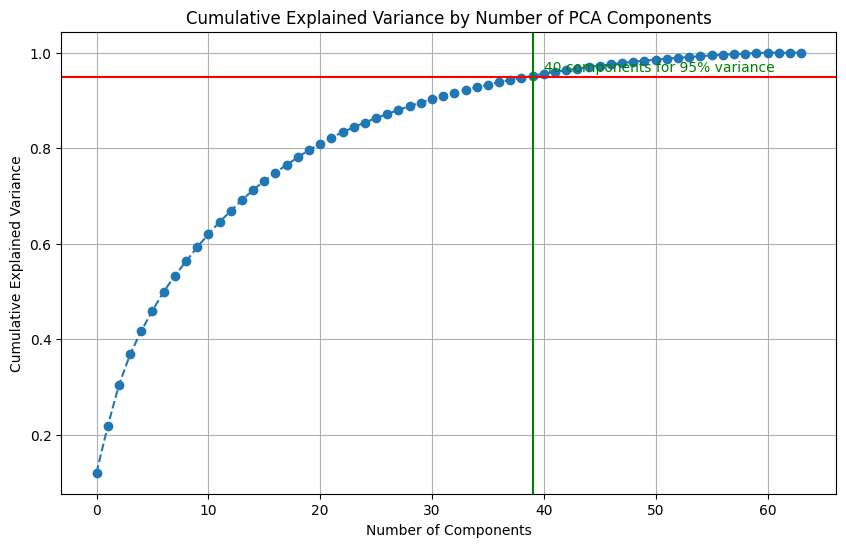

Cumulative explained variance calculated and plotted.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Apply PCA to X_train_scaled with all possible components
# This is equivalent to n_components = min(n_samples, n_features)
pca_full = PCA().fit(X_train_scaled)

# 2. Calculate the cumulative explained variance ratio
cum_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 3. Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cum_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cum_explained_variance >= 0.95), color='g', linestyle='-')
plt.text(np.argmax(cum_explained_variance >= 0.95) + 1, 0.96, f'{np.argmax(cum_explained_variance >= 0.95) + 1} components for 95% variance', color='g')
plt.show()

print("Cumulative explained variance calculated and plotted.")

In [5]:
import numpy as np
from sklearn.decomposition import PCA

# Find the number of components for 95% variance based on the previously computed cumulative explained variance
n_components_95 = np.argmax(cum_explained_variance >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components_95}")

# 1. Apply PCA with the optimal number of components (95% variance)
pca_optimal = PCA(n_components=n_components_95)
X_train_pca_optimal = pca_optimal.fit_transform(X_train_scaled)
X_test_pca_optimal = pca_optimal.transform(X_test_scaled)

print(f"X_train_scaled transformed with {n_components_95} components. Shape: {X_train_pca_optimal.shape}")
print(f"X_test_scaled transformed with {n_components_95} components. Shape: {X_test_pca_optimal.shape}")

# 2. Apply PCA with 2 components for visualization purposes
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
X_test_pca_2d = pca_2d.transform(X_test_scaled)

print(f"X_train_scaled transformed with 2 components. Shape: {X_train_pca_2d.shape}")
print(f"X_test_scaled transformed with 2 components. Shape: {X_test_pca_2d.shape}")

Number of components for 95% variance: 40
X_train_scaled transformed with 40 components. Shape: (1437, 40)
X_test_scaled transformed with 40 components. Shape: (360, 40)
X_train_scaled transformed with 2 components. Shape: (1437, 2)
X_test_scaled transformed with 2 components. Shape: (360, 2)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Train Logistic Regression on original scaled data
log_reg_scaled = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs') # Increased max_iter for convergence
log_reg_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate on original scaled test data
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy on original scaled data: {accuracy_scaled:.4f}")

# 2. Train Logistic Regression on PCA-reduced data (optimal components)
log_reg_pca = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs') # Increased max_iter for convergence
log_reg_pca.fit(X_train_pca_optimal, y_train)

# Predict and evaluate on PCA-reduced test data
y_pred_pca = log_reg_pca.predict(X_test_pca_optimal)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy on PCA-reduced data ({n_components_95} components): {accuracy_pca:.4f}")

print("Logistic Regression models trained and evaluated.")

Accuracy on original scaled data: 0.9722
Accuracy on PCA-reduced data (40 components): 0.9611
Logistic Regression models trained and evaluated.


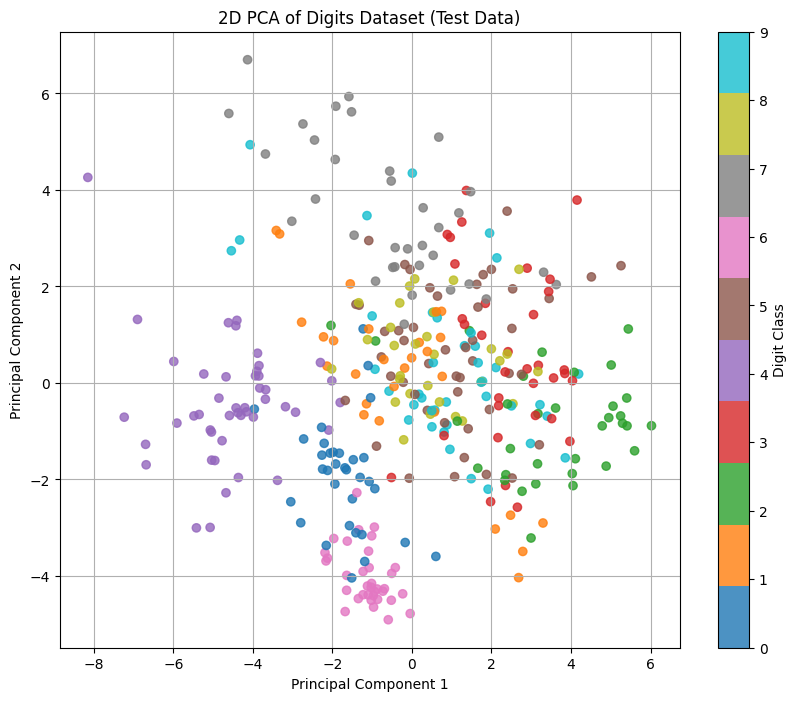

2D PCA transformed test data visualized.


In [7]:
import matplotlib.pyplot as plt

# 1. Create a scatter plot of the 2D PCA transformed test data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=y_test, cmap='tab10', alpha=0.8)

# 2. Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Digits Dataset (Test Data)')

# 3. Add a colorbar for the classes
cbar = plt.colorbar(scatter)
cbar.set_label('Digit Class')

plt.grid(True)
plt.show()

print("2D PCA transformed test data visualized.")